# Проверка времени для разреженного и плотного формата

In [43]:
import numpy as np
import scipy.sparse as sps
import timeit
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

np.random.seed(42)

n_values = np.linspace(200, 2000, dtype=int)
density = 50

# Заранее создаём и храним матрицы и векторы
sparse_matrices = []
dense_matrices = []
vectors = []

for n in n_values:
    A_sparse = sps.random(n, n, density=density/n**2, format='csr', random_state=42)
    A_dense  = A_sparse.toarray()
    x        = np.random.rand(n)
    
    sparse_matrices.append(A_sparse)
    dense_matrices.append(A_dense)
    vectors.append(x)

sparse_times = []
dense_times = []

pbar = tqdm(range(len(n_values)))

for i in pbar:
    pbar.set_description(f"Размер матрицы {n_values[i]}x{n_values[i]}")
    n = n_values[i]
    A_sparse = sparse_matrices[i]
    A_dense  = dense_matrices[i]
    x        = vectors[i]

    # Прогрев (не меряем это время, просто вызываем 1 раз)
    A_sparse.dot(x)
    A_dense.dot(x)

    # Параметры timeit
    number_runs = 200   # В каждом "повторе" делаем 200 умножений
    repeat_runs = 5     # Сколько серий замеров делаем

    setup_code = """
import numpy as np
import scipy.sparse as sps
from __main__ import A_sparse, A_dense, x
"""

    # Собираем многократные замеры и берём медиану
    times_sparse = timeit.repeat(stmt="A_sparse.dot(x)",
                                 setup=setup_code,
                                 repeat=repeat_runs,
                                 number=number_runs)
    times_dense  = timeit.repeat(stmt="A_dense.dot(x)",
                                 setup=setup_code,
                                 repeat=repeat_runs,
                                 number=number_runs)

    median_sparse = np.median(times_sparse) / number_runs
    median_dense  = np.median(times_dense)  / number_runs

    sparse_times.append(median_sparse)
    dense_times.append(median_dense)


  0%|          | 0/50 [00:00<?, ?it/s]

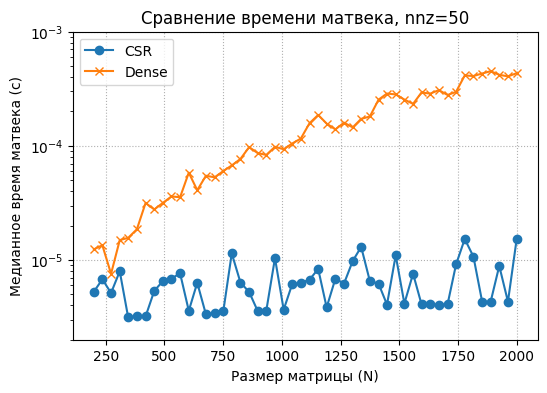

In [45]:
# Построение графика
plt.figure(figsize=(6, 4))
plt.plot(n_values, sparse_times, marker='o', label='CSR')
plt.plot(n_values, dense_times, marker='x', label='Dense')
plt.yscale('log')
plt.grid(linestyle=':')
plt.xlabel('Размер матрицы (N)')
plt.ylabel('Медианное время матвека (с)')
plt.title(f'Сравнение времени матвека, nnz={density}')
plt.ylim(2e-6,1e-3)
plt.legend()
plt.savefig('sparse_fixed_nnz.pdf')
plt.show()

In [49]:
import numpy as np
import scipy.sparse as sps
import timeit
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

np.random.seed(42)

n_values = np.linspace(200, 2000, dtype=int)
density = 0.01

# Заранее создаём и храним матрицы и векторы
sparse_matrices = []
dense_matrices = []
vectors = []

for n in n_values:
    A_sparse = sps.random(n, n, density=density, format='csr', random_state=42)
    A_dense  = A_sparse.toarray()
    x        = np.random.rand(n)
    
    sparse_matrices.append(A_sparse)
    dense_matrices.append(A_dense)
    vectors.append(x)

sparse_times = []
dense_times = []

pbar = tqdm(range(len(n_values)))

for i in pbar:
    pbar.set_description(f"Размер матрицы {n_values[i]}x{n_values[i]}")
    n = n_values[i]
    A_sparse = sparse_matrices[i]
    A_dense  = dense_matrices[i]
    x        = vectors[i]

    # Прогрев (не меряем это время, просто вызываем 1 раз)
    A_sparse.dot(x)
    A_dense.dot(x)

    # Параметры timeit
    number_runs = 200   # В каждом "повторе" делаем 200 умножений
    repeat_runs = 5     # Сколько серий замеров делаем

    setup_code = """
import numpy as np
import scipy.sparse as sps
from __main__ import A_sparse, A_dense, x
"""

    # Собираем многократные замеры и берём медиану
    times_sparse = timeit.repeat(stmt="A_sparse.dot(x)",
                                 setup=setup_code,
                                 repeat=repeat_runs,
                                 number=number_runs)
    times_dense  = timeit.repeat(stmt="A_dense.dot(x)",
                                 setup=setup_code,
                                 repeat=repeat_runs,
                                 number=number_runs)

    median_sparse = np.median(times_sparse) / number_runs
    median_dense  = np.median(times_dense)  / number_runs

    sparse_times.append(median_sparse)
    dense_times.append(median_dense)


  0%|          | 0/50 [00:00<?, ?it/s]

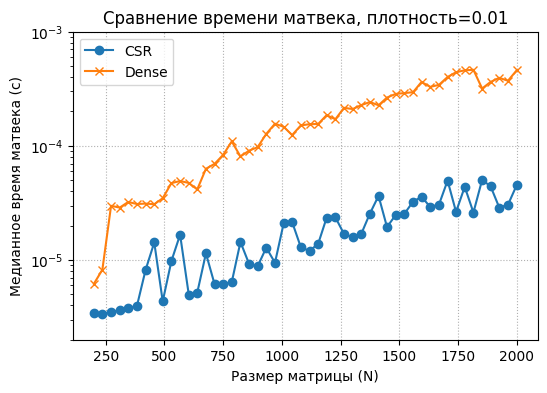

In [50]:
# Построение графика
plt.figure(figsize=(6, 4))
plt.plot(n_values, sparse_times, marker='o', label='CSR')
plt.plot(n_values, dense_times, marker='x', label='Dense')
plt.yscale('log')
plt.grid(linestyle=':')
plt.xlabel('Размер матрицы (N)')
plt.ylabel('Медианное время матвека (с)')
plt.title(f'Сравнение времени матвека, плотность={density}')
plt.ylim(2e-6,1e-3)
plt.legend()
plt.savefig('sparse_fixed_density.pdf')
plt.show()

# Потеря разреженности

Исходная разреженная матрица A (ненулевые элементы):
  (0, 0)	1.8776782503720555
  (1, 0)	0.28666311355271434
  (2, 0)	0.06125074516763307
  (3, 0)	0.20815901357243471
  (4, 0)	0.14911718572511817
  (5, 0)	0.4377389771128421
  (6, 0)	0.2536100905730013
  (7, 0)	0.28875627305162155
  (8, 0)	0.1176452024641696
  (9, 0)	0.3995317737956705
  (0, 1)	0.16470247073023336
  (1, 1)	1.535850677660174
  (0, 2)	0.4023472696302903
  (2, 2)	1.4785209479554453
  (0, 3)	0.4455542569562675
  (3, 3)	1.7728187724647264
  (0, 4)	0.3091274855628439
  (4, 4)	1.7410960035518377
  (0, 5)	0.2777895963540577
  (5, 5)	1.7042765323899776
  (0, 6)	0.33594337379731914
  (6, 6)	1.6899009560005396
  (0, 7)	0.08153032873935356
  (7, 7)	1.5153959971781843
  (0, 8)	0.04367183810471542
  (8, 8)	1.9264755359754915
  (0, 9)	0.41007513748355745
  (9, 9)	1.8906414097273678


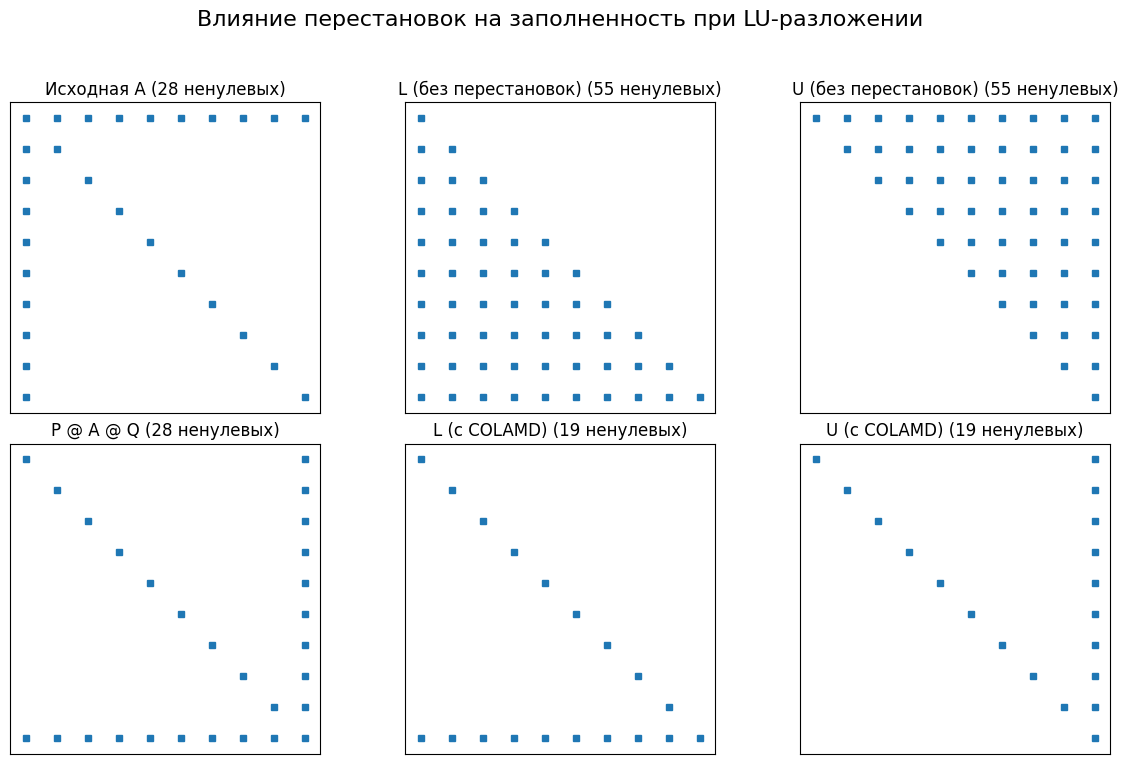


Сравнение количества ненулевых элементов:
Исходная матрица A: 28
L (без перестановок): 55
U (без перестановок): 55
Сумма L+U (без перестановок): 100
--------------------
L (с COLAMD): 19
U (с COLAMD): 19
Сумма L+U (с COLAMD): 28


In [52]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

# 1. Создание разреженной матрицы
# Создадим матрицу, где LU разложение без перестановок приведет к заполнению.
# Пример: "стреловидная" матрица (arrowhead matrix)
n = 10
A_dense = np.diag(np.random.rand(n) + 1)  # Диагональ
A_dense[0, 1:] = np.random.rand(n - 1) * 0.5
A_dense[1:, 0] = np.random.rand(n - 1) * 0.5
A = sp.csc_matrix(A_dense) # Преобразуем в разреженный формат CSC (Compressed Sparse Column)

print("Исходная разреженная матрица A (ненулевые элементы):")
print(A)

# 2. LU разложение без перестановок (естественный порядок)
# Используем splu (SuperLU) из scipy.sparse.linalg
# permc_spec="NATURAL" означает отсутствие перестановок столбцов
lu_natural = spla.splu(A, permc_spec="NATURAL", diag_pivot_thresh=0) # diag_pivot_thresh=0 отключает частичный пивотинг

L_natural = lu_natural.L
U_natural = lu_natural.U

# 3. LU разложение с перестановками для минимизации заполнения
# Используем COLAMD (Column Approximate Minimum Degree) - популярный алгоритм
# splu по умолчанию использует перестановки для уменьшения заполнения
lu_permuted = spla.splu(A, diag_pivot_thresh=0) # По умолчанию permc_spec='COLAMD'

L_permuted = lu_permuted.L
U_permuted = lu_permuted.U
# Важно: Факторы L и U соответствуют матрице P @ A @ Q, где P и Q - матрицы перестановок
# lu_permuted.perm_r содержит индексы перестановки строк (P)
# lu_permuted.perm_c содержит индексы перестановки столбцов (Q)

# 4. Визуализация разреженности
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Влияние перестановок на заполненность при LU-разложении", fontsize=16)

# Исходная матрица
axs[0, 0].spy(A, markersize=5)
axs[0, 0].set_title(f"Исходная A ({A.nnz} ненулевых)")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])


# Факторы без перестановок
axs[0, 1].spy(L_natural, markersize=5)
axs[0, 1].set_title(f"L (без перестановок) ({L_natural.nnz} ненулевых)")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])


axs[0, 2].spy(U_natural, markersize=5)
axs[0, 2].set_title(f"U (без перестановок) ({U_natural.nnz} ненулевых)")
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])


# Переставленная матрица (для наглядности, хотя splu работает с ней неявно)
P = sp.csc_matrix((np.ones(n), (lu_permuted.perm_r, np.arange(n))))
Q = sp.csc_matrix((np.ones(n), (np.arange(n), lu_permuted.perm_c)))
A_permuted = P @ A @ Q

axs[1, 0].spy(A_permuted, markersize=5)
axs[1, 0].set_title(f"P @ A @ Q ({A_permuted.nnz} ненулевых)")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])


# Факторы с перестановками
axs[1, 1].spy(L_permuted, markersize=5)
axs[1, 1].set_title(f"L (с COLAMD) ({L_permuted.nnz} ненулевых)")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])


axs[1, 2].spy(U_permuted, markersize=5)
axs[1, 2].set_title(f"U (с COLAMD) ({U_permuted.nnz} ненулевых)")
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.savefig('sparse_permutation.pdf')
plt.show()

print("\nСравнение количества ненулевых элементов:")
print(f"Исходная матрица A: {A.nnz}")
print(f"L (без перестановок): {L_natural.nnz}")
print(f"U (без перестановок): {U_natural.nnz}")
print(f"Сумма L+U (без перестановок): {L_natural.nnz + U_natural.nnz - n}") # Вычитаем диагональ L, которая вся единицы
print("-" * 20)
print(f"L (с COLAMD): {L_permuted.nnz}")
print(f"U (с COLAMD): {U_permuted.nnz}")
print(f"Сумма L+U (с COLAMD): {L_permuted.nnz + U_permuted.nnz - n}")
